In [52]:
import pandas as pd
from scipy import stats

In [53]:
# Membaca File CSV dan Menambahkan Header Pada Dataframe
column = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]
data = pd.read_csv("anggur.csv", skiprows=1, names=column)
anggur_non_target = data[data.columns[0:11]]    # Dari Fixed Acidity - Alcohol

NOMOR 1

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [54]:
# Deskripsi Statika Untuk Kolom Non Target
anggur_non_target.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000


In [65]:
# Modus
for column in anggur_non_target:
    modus = anggur_non_target[column].mode()
    print(column + ": ", end="")
    if (len(modus) != anggur_non_target.shape[0]):
        for j in range (len(modus)):
            if j != len(modus) - 1:
                print(modus[j], end=", ")
            else :
                print(modus[j])
    else :
        print("Data unik, semua value adalah modus")

Fixed Acidity: 6.54
Volatile Acidity: 0.5546
Citric Acid: 0.3019
Residual Sugar: Data unik, semua value adalah modus
Chlorides: Data unik, semua value adalah modus
Free Sulfur Dioxide: Data unik, semua value adalah modus
Total Sulfur Dioxide: 35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51
Density: 0.9959, 0.9961, 0.9965, 0.997
pH: 3.34
Sulphates: 0.59
Alcohol: 9.86, 10.31


In [70]:
# Variansi
anggur_non_target.var()

Fixed Acidity            1.443837
Volatile Acidity         0.009187
Citric Acid              0.002411
Residual Sugar           0.975977
Chlorides                0.000404
Free Sulfur Dioxide     23.893519
Total Sulfur Dioxide    99.316519
Density                  0.000004
pH                       0.010999
Sulphates                0.010164
Alcohol                  2.282233
dtype: float64

In [57]:
# Range
anggur_non_target.max() - anggur_non_target.min()

Fixed Acidity            8.170000
Volatile Acidity         0.665200
Citric Acid              0.292900
Residual Sugar           5.518200
Chlorides                0.125635
Free Sulfur Dioxide     27.267847
Total Sulfur Dioxide    66.810000
Density                  0.013800
pH                       0.740000
Sulphates                0.670000
Alcohol                  8.990000
dtype: float64

In [58]:
#IQR
anggur_non_target.quantile(0.75) - anggur_non_target.quantile(0.25)

Fixed Acidity            1.622500
Volatile Acidity         0.129275
Citric Acid              0.064525
Residual Sugar           1.324544
Chlorides                0.028738
Free Sulfur Dioxide      6.886381
Total Sulfur Dioxide    13.237500
Density                  0.002600
pH                       0.140000
Sulphates                0.140000
Alcohol                  2.062500
dtype: float64

In [59]:
# Skewneww
anggur_non_target.skew()

Fixed Acidity          -0.028879
Volatile Acidity       -0.197699
Citric Acid            -0.045576
Residual Sugar          0.132638
Chlorides              -0.051319
Free Sulfur Dioxide     0.007130
Total Sulfur Dioxide   -0.024060
Density                -0.076883
pH                      0.147673
Sulphates               0.149199
Alcohol                -0.018991
dtype: float64

In [60]:
# Kurtosis
anggur_non_target.kurtosis()

Fixed Acidity          -0.019292
Volatile Acidity        0.161853
Citric Acid            -0.104679
Residual Sugar         -0.042980
Chlorides              -0.246508
Free Sulfur Dioxide    -0.364964
Total Sulfur Dioxide    0.063950
Density                 0.016366
pH                      0.080910
Sulphates               0.064819
Alcohol                -0.131732
dtype: float64

NOMOR 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

In [61]:
# Fungsi untuk menghasilkan visualisasi plot distribusi data untuk Histogram dan Boxplot
def boxplot_histogram(column):
    data.boxplot(column=[column])
    data.hist(column=[column])

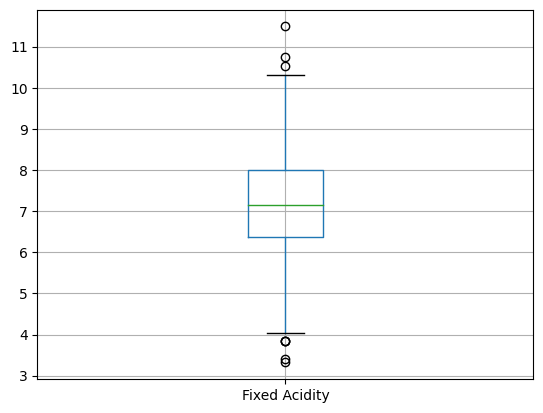

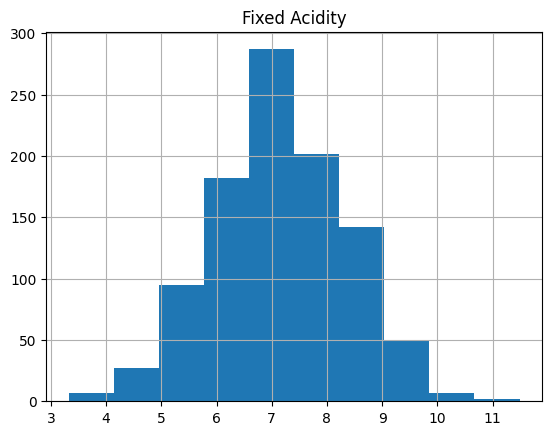

In [62]:
# Kolom Fixed Acidity
boxplot_histogram("Fixed Acidity")

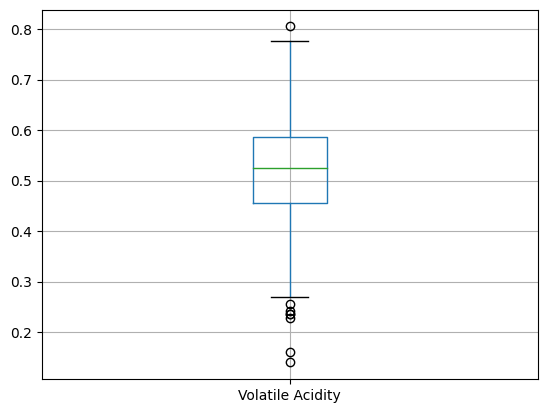

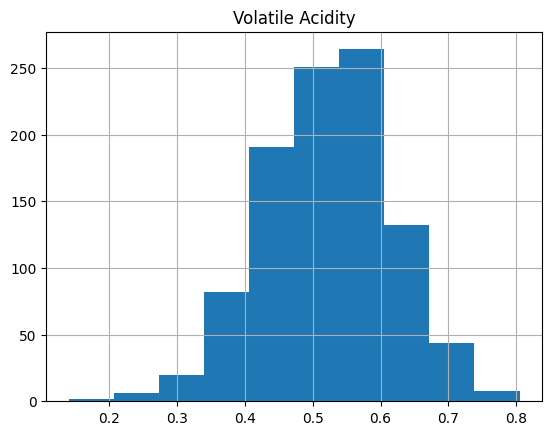

In [63]:
# Kolom Volatile Acidity
boxplot_histogram("Volatile Acidity")

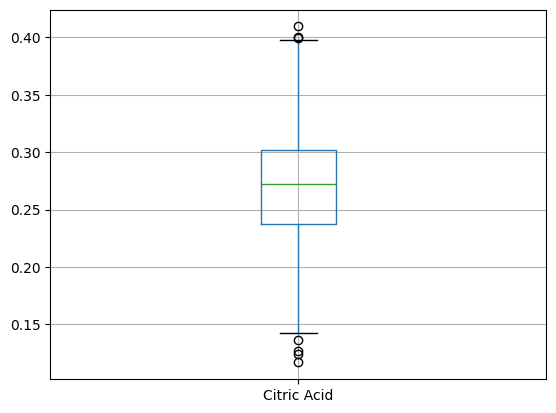

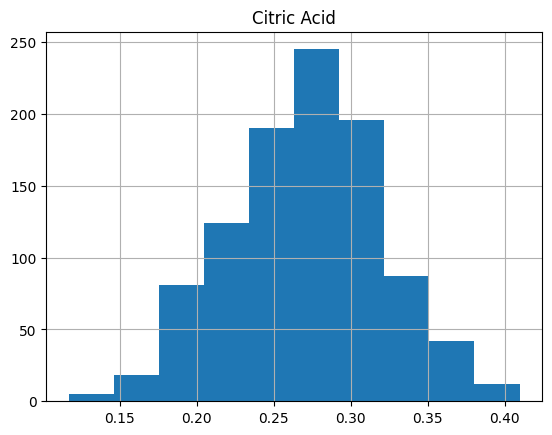

In [64]:
# Kolom Citric Acid
boxplot_histogram("Citric Acid")

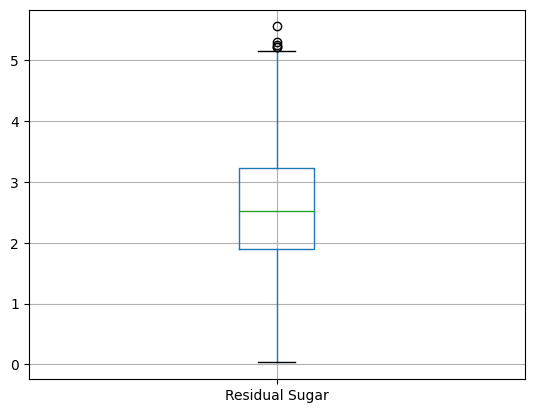

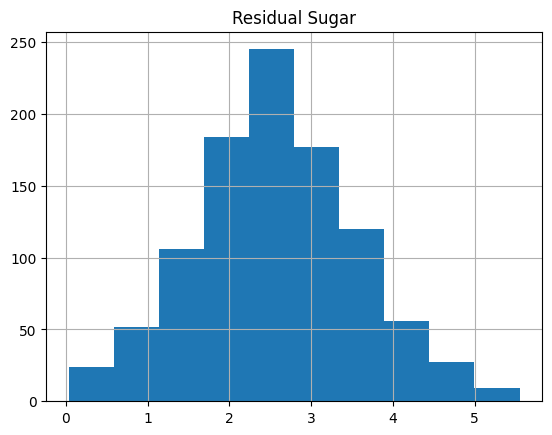

In [71]:
# Kolom Residual Sugar
boxplot_histogram("Residual Sugar")

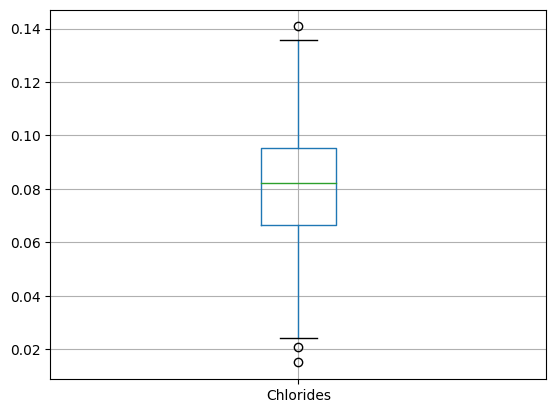

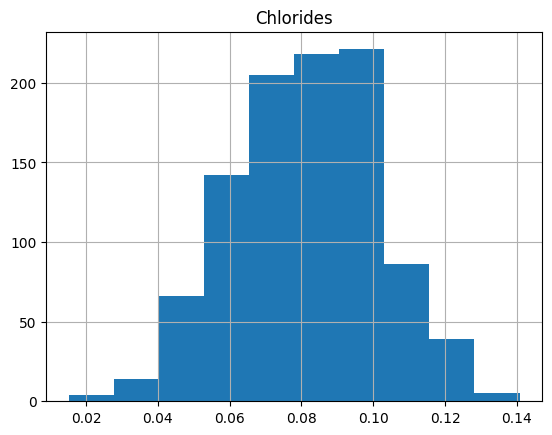

In [72]:
# Kolom Chlorides
boxplot_histogram("Chlorides")

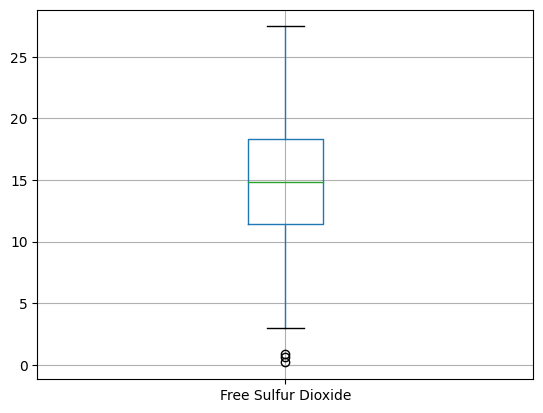

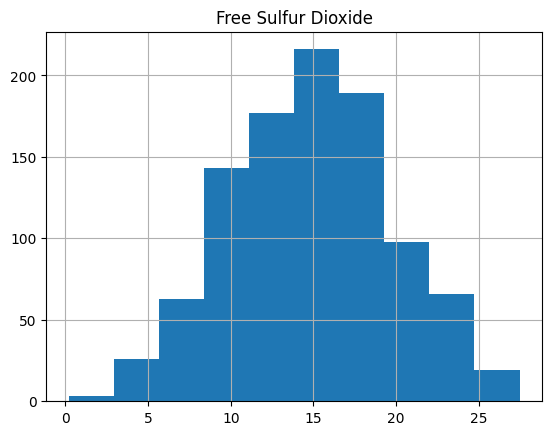

In [73]:
# Kolom Free Sulfur Dioxide
boxplot_histogram("Free Sulfur Dioxide")

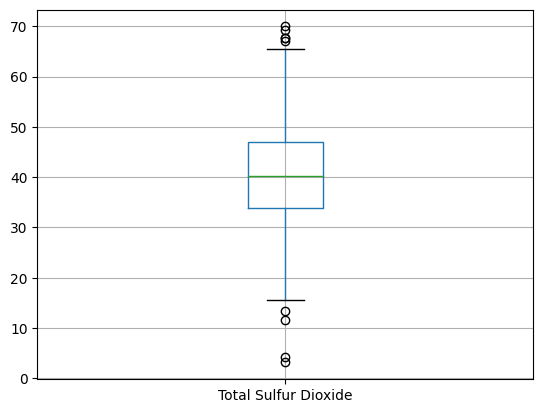

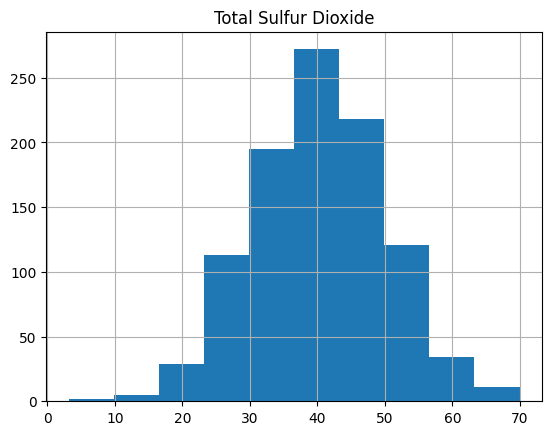

In [74]:
# Kolom Total Sulfur Dioxide
boxplot_histogram("Total Sulfur Dioxide")

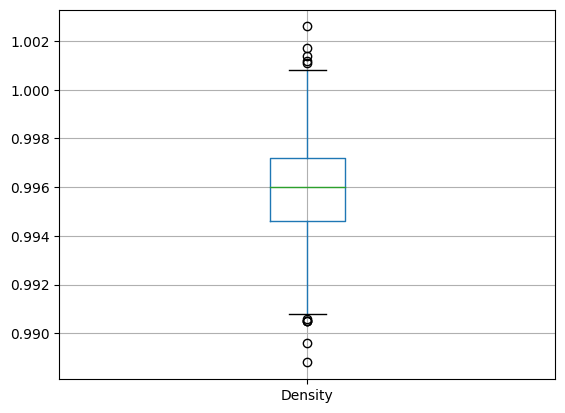

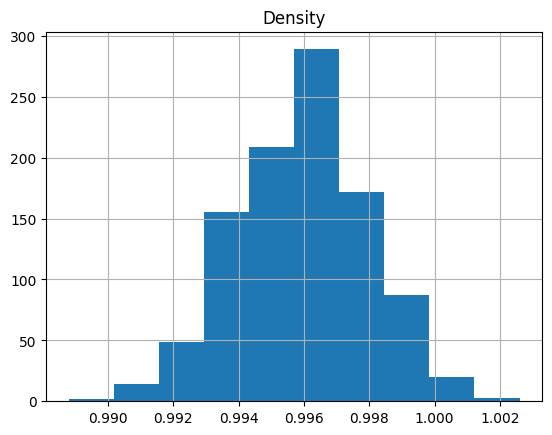

In [75]:
# Kolom Density
boxplot_histogram("Density")

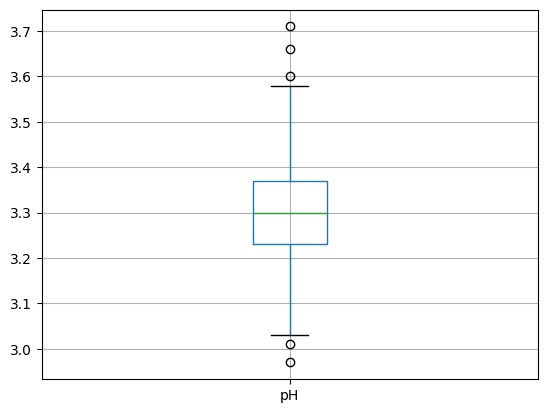

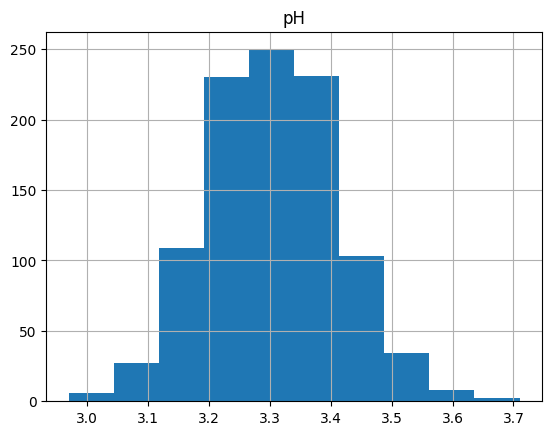

In [76]:
# Kolom pH
boxplot_histogram("pH")

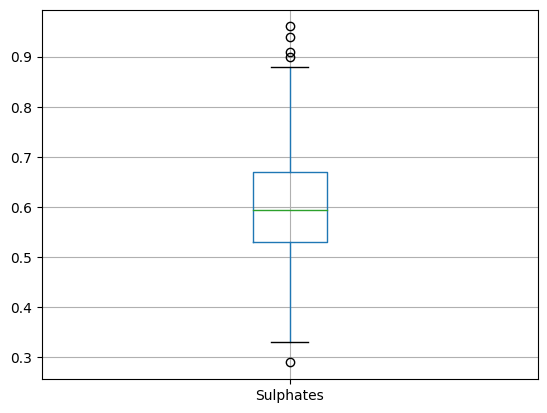

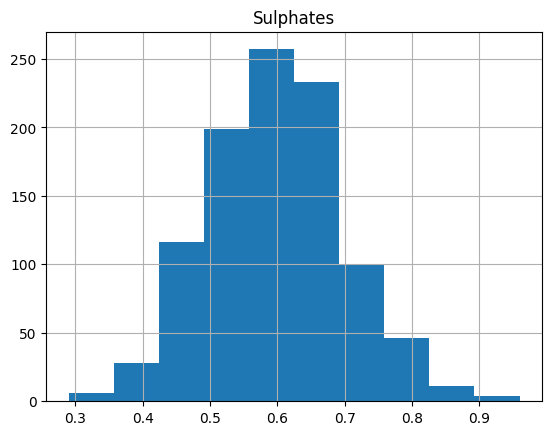

In [77]:
# Kolom Sulphates
boxplot_histogram("Sulphates")

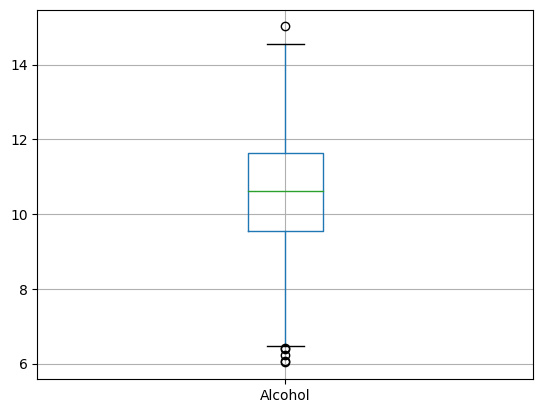

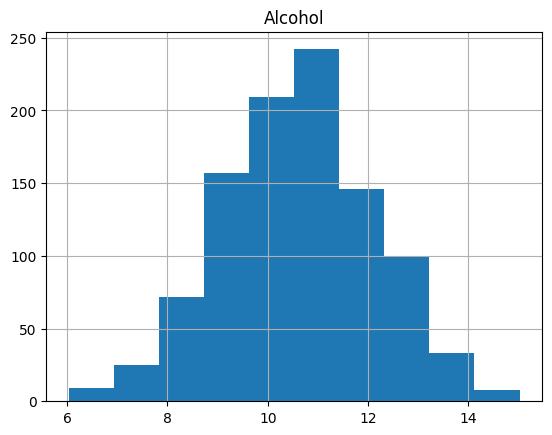

In [78]:
# Kolom Alcohol
boxplot_histogram("Alcohol")